In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import get_features
from object_selection import ObjectSelection
from load_data import load_data

# Parameters
data_directory = '../../data/generated-data-r-2-n-8-2/'
features_path = '../../data/features-generated-data-r-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = [1, 7]

#thresholds 3 ratings
#ratings_thresholds = [1, 5, 8]

#file_to_delete = data_directory + '.DS_Store'
#os.remove(file_to_delete)

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file, users_file, rating_thresholds)

features = get_features(features_path, name_vector)

/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Random selection
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-random.csv'
for _ in range(10):
    selection = ObjectSelection(show_selection_results=True, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix, cv_results_file=cv_results_file)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')

Object selection: random

Dfmf

Parameters

12 12 2 2


auc: 0.7128340680534508

rmse: 1.0477863415563395


-----


Object selection: random

Dfmf

Parameters

12 12 2 2


auc: 0.712008824536779

rmse: 1.0365492662627807


-----


Object selection: random

Dfmf

Parameters

12 12 2 2


auc: 0.698150016471751

rmse: 1.0431122240098383


-----


Object selection: random

Dfmf

Parameters

12 12 2 2


auc: 0.6941350469196246

rmse: 1.069423614496685


-----


Object selection: random

Dfmf

Parameters

12 12 2 2


auc: 0.7174128043367458

rmse: 1.0685372265334754


-----


Object selection: random

Dfmf

Parameters

12 12 2 2


auc: 0.7160926410673922

rmse: 1.032071499013271


-----


Object selection: random

Dfmf

Parameters

12 12 2 2


auc: 0.7026454041532224

rmse: 1.0223048437730404


-----


Object selection: random

Dfmf

Parameters

12 12 2 2


auc: 0.7121580236831359

rmse: 1.0396129689136475


-----


Object selection: random

Dfmf

Parameters

12 12 2 2


auc: 0.7002068097198

Object selection: knn

Draw object selection results

Classification Accuracy
0.7483333333333333



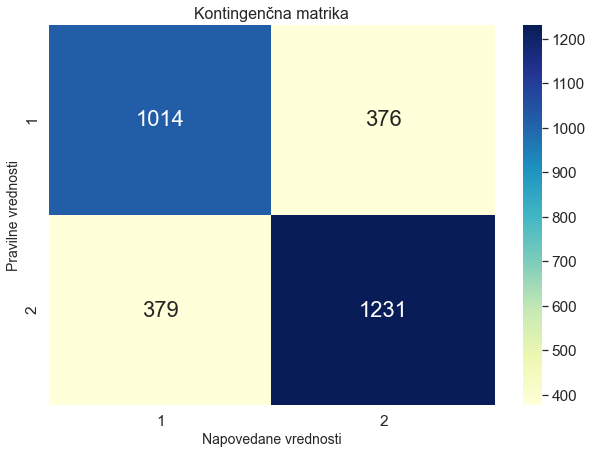


Dfmf

Parameters

12 12 2 2


auc: 0.6937621990891346

rmse: 1.0438171494480297


-----


Object selection: knn

Draw object selection results

Classification Accuracy
0.7483333333333333



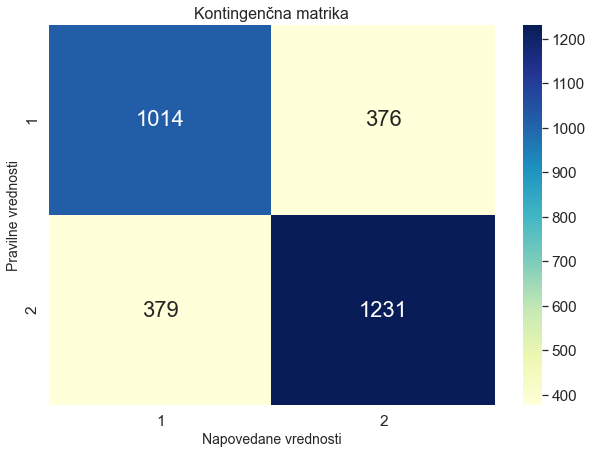


Dfmf

Parameters

12 12 2 2


auc: 0.6967626998935308

rmse: 1.072612982621331


-----


Object selection: knn

Draw object selection results

Classification Accuracy
0.7483333333333333



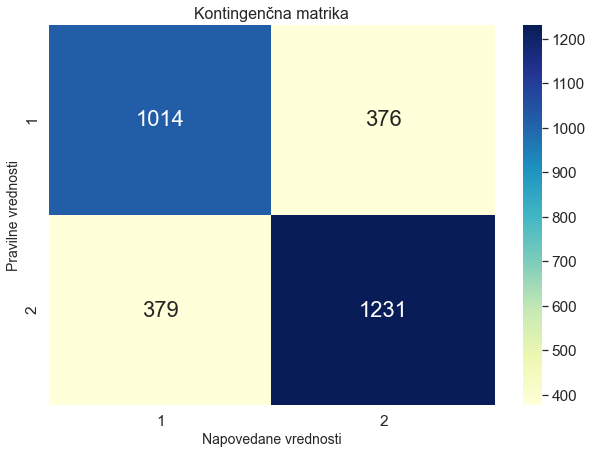


Dfmf

Parameters

12 12 2 2


auc: 0.7075538461538462

rmse: 1.0816046432000144


-----


Object selection: knn

Draw object selection results

Classification Accuracy
0.7483333333333333



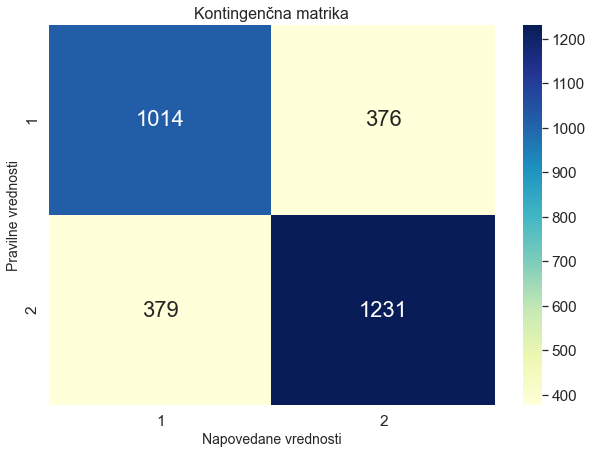


Dfmf

Parameters

12 12 2 2


auc: 0.7052103861978357

rmse: 1.063559167005667


-----


Object selection: knn

Draw object selection results

Classification Accuracy
0.7483333333333333



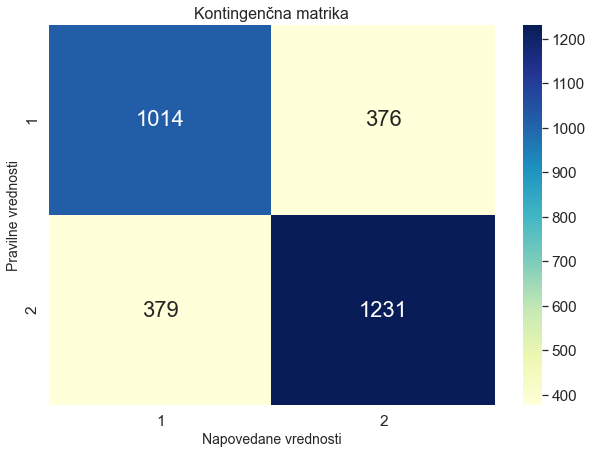


Dfmf

Parameters

12 12 2 2


auc: 0.685533960292581

rmse: 1.057065611362998


-----


Object selection: knn

Draw object selection results

Classification Accuracy
0.7483333333333333



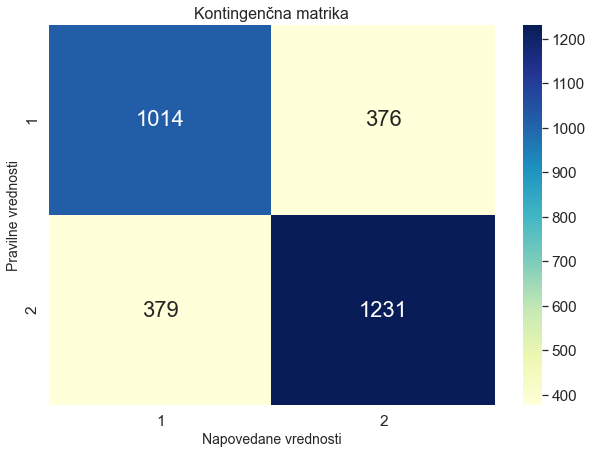


Dfmf

Parameters

12 12 2 2


auc: 0.7030524928050133

rmse: 1.0483908296366422


-----


Object selection: knn

Draw object selection results

Classification Accuracy
0.7483333333333333



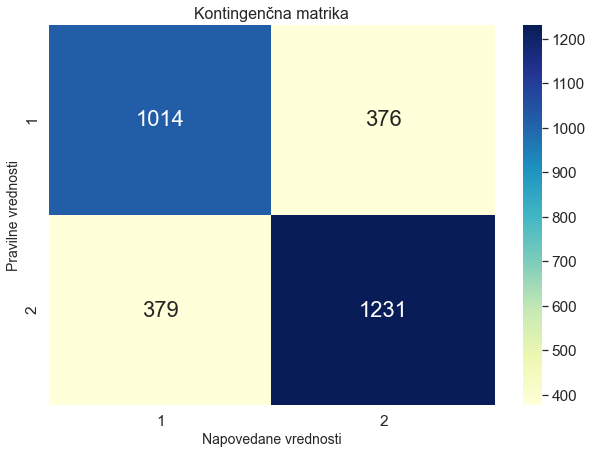


Dfmf

Parameters

12 12 2 2


auc: 0.7070096972359217

rmse: 1.0258957317201518


-----


Object selection: knn

Draw object selection results

Classification Accuracy
0.7483333333333333



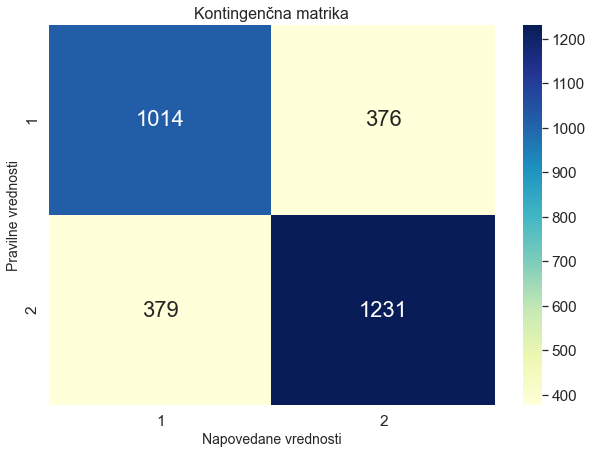


Dfmf

Parameters

12 12 2 2


auc: 0.68741961414791

rmse: 1.0669374187763518


-----


Object selection: knn

Draw object selection results

Classification Accuracy
0.7483333333333333



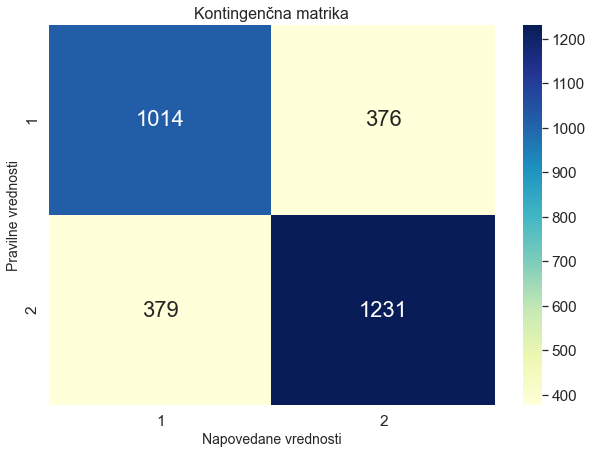


Dfmf

Parameters

12 12 2 2


auc: 0.7062863180137348

rmse: 1.0362565912496913


-----


Object selection: knn

Draw object selection results

Classification Accuracy
0.7483333333333333



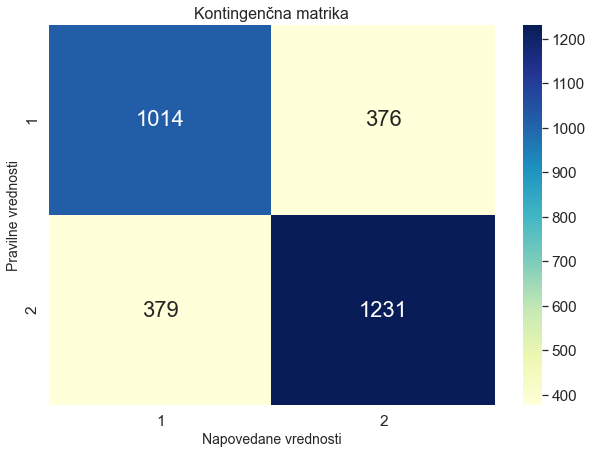


Dfmf

Parameters

12 12 2 2


auc: 0.7031534409809171

rmse: 1.0596848184865753


-----




In [3]:
# K Nearest Neighbors
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-knn.csv'
for _ in range(10):
    selection = ObjectSelection(show_selection_results=True, selection_algorithm='knn')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix, cv_results_file=cv_results_file)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')